<a href="https://colab.research.google.com/github/bcbao/bcbao/blob/main/Survival_Covid_cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 12.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=e0ddc59492ce0bf1a7b605a5bfcccb585448c283e38f6c771a6eac35cb885a4d
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


Overall Survival in %
Healthy Cont: 100.00%
Cardio: 68.15%
Migraine: 91.30%
Others: 83.84%
Blood: 100.00%


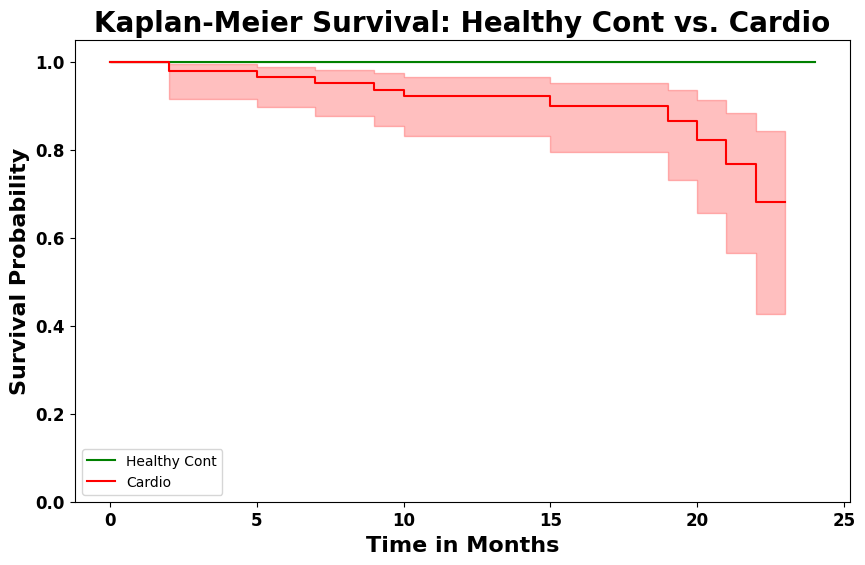

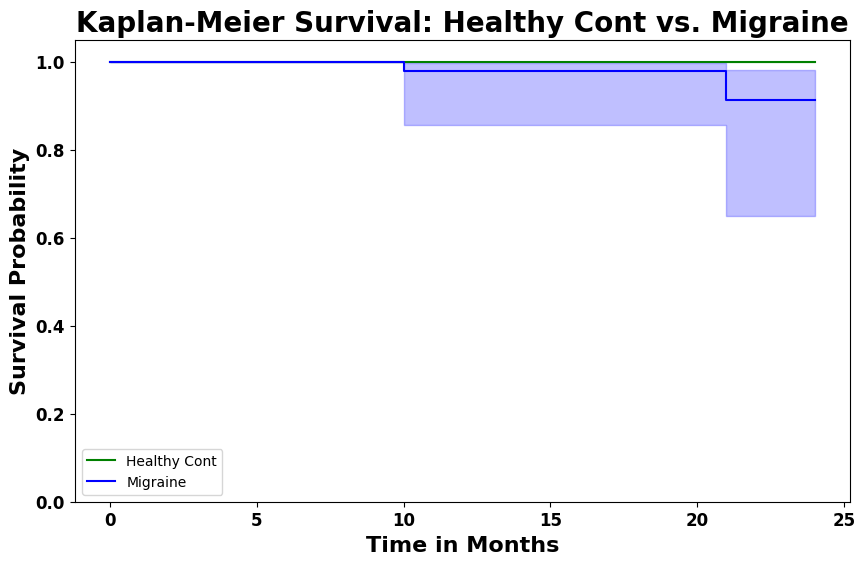

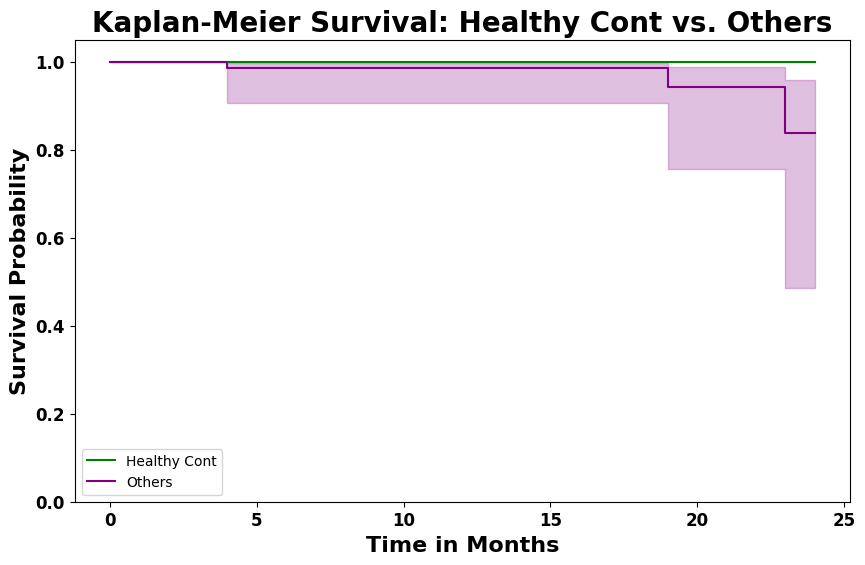

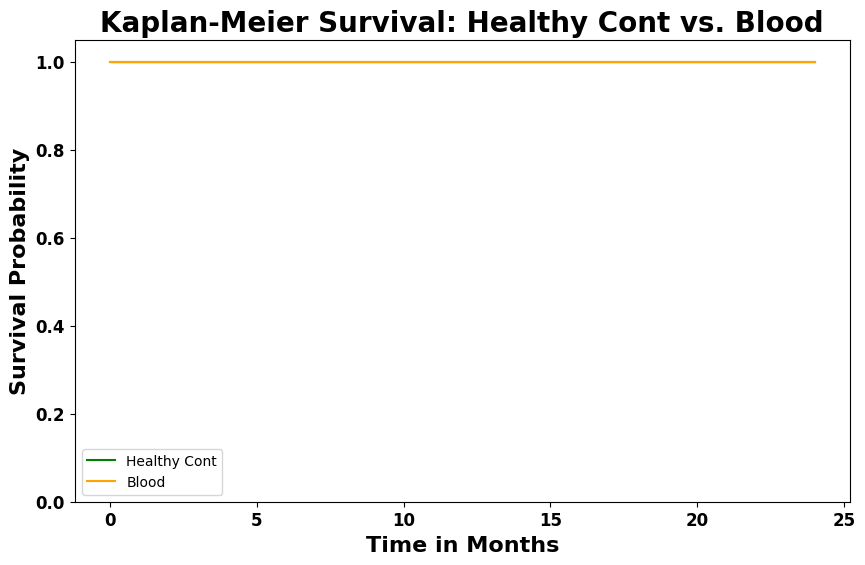

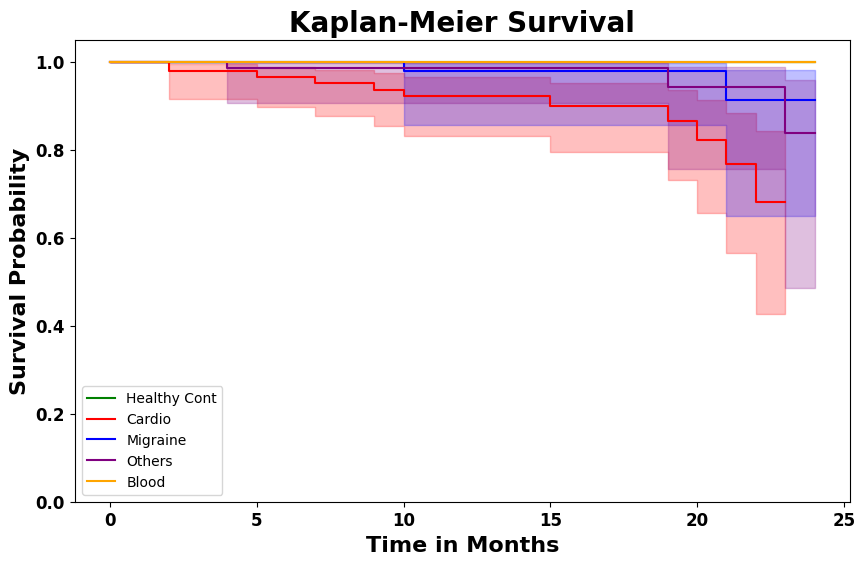

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Group 1:
durations_100 = np.full(223, 24)  # All censored at 24 months
events_100 = np.zeros(223)        # No event occurred

# Group 2:
durations_86 = np.random.randint(1, 25, size=93)   # Random durations
events_86 = np.random.choice([0, 1], size=93, p=[0.9, 0.1])  # Random events

# Group 3
durations_3 = np.random.randint(1, 25, size=75)
events_3 = np.random.choice([0, 1], size=75, p=[0.92, 0.08])  # Different event probabilities

# Group 4
durations_4 = np.random.randint(1, 25, size=83)
events_4 = np.random.choice([0, 1], size=83, p=[0.99, 0.01])  # Different event probabilities

# Group 5
durations_5 = np.random.randint(1, 25, size=63)
events_5 = np.random.choice([0, 1], size=63, p=[0.99, 0.01])  # Different event probabilities

# Kaplan-Meier Estimator for each group
kmf_100 = KaplanMeierFitter()
kmf_86 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()
kmf_4 = KaplanMeierFitter()
kmf_5 = KaplanMeierFitter()

# Fit the data for each group
kmf_100.fit(durations_100, events_100, label='Healthy Cont')
kmf_86.fit(durations_86, events_86, label='Cardio')
kmf_3.fit(durations_3, events_3, label='Migraine')
kmf_4.fit(durations_4, events_4, label='Others')
kmf_5.fit(durations_5, events_5, label='Blood')

# Custom function to plot comparison
def plot_comparison(group_name, kmf_group, color):
    plt.figure(figsize=(10, 6))
    font_prop = font_manager.FontProperties(weight='bold', size=12)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Plotting the Healthy Cont group and the specified group
    kmf_100.plot_survival_function(color='Green')
    kmf_group.plot_survival_function(color=color)

    plt.title(f'Kaplan-Meier Survival: Healthy Cont vs. {group_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Time in Months', fontsize=16, fontweight='bold')
    plt.ylabel('Survival Probability', fontsize=16, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(False)
    plt.legend()
    plt.show()

# Function to calculate overall survival
def calculate_overall_survival(kmf):
    survival_probability = kmf.survival_function_.iloc[-1, 0]  # Last survival probability
    return survival_probability * 100  # Convert to percentage

# Calculate and print overall survival for each group
print("Overall Survival in %")
print(f"Healthy Cont: {calculate_overall_survival(kmf_100):.2f}%")
print(f"Cardio: {calculate_overall_survival(kmf_86):.2f}%")
print(f"Migraine: {calculate_overall_survival(kmf_3):.2f}%")
print(f"Others: {calculate_overall_survival(kmf_4):.2f}%")
print(f"Blood: {calculate_overall_survival(kmf_5):.2f}%")

# Plot comparisons
plot_comparison('Cardio', kmf_86, 'red')
plot_comparison('Migraine', kmf_3, 'blue')
plot_comparison('Others', kmf_4, 'purple')
plot_comparison('Blood', kmf_5, 'orange')


# Plotting with custom colors
plt.figure(figsize=(10, 6))
# Setting the font size for X and Y axis labels
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed

# Setting the font size and making the tick labels bold
font_prop = font_manager.FontProperties(weight='bold', size=12)

plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

kmf_100.plot_survival_function(color='Green')
kmf_86.plot_survival_function(color='red')
kmf_3.plot_survival_function(color='Blue')
kmf_4.plot_survival_function(color='purple')
kmf_5.plot_survival_function(color='orange')
plt.title('Kaplan-Meier Survival', fontsize=20, fontweight='bold')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)
plt.grid(False)
plt.legend()
plt.show()


Overall Survival in %
Healthy Cont: 100.00%
Cardio: 75.17%
Migraine: 96.61%
Others: 96.04%
Blood: 100.00%


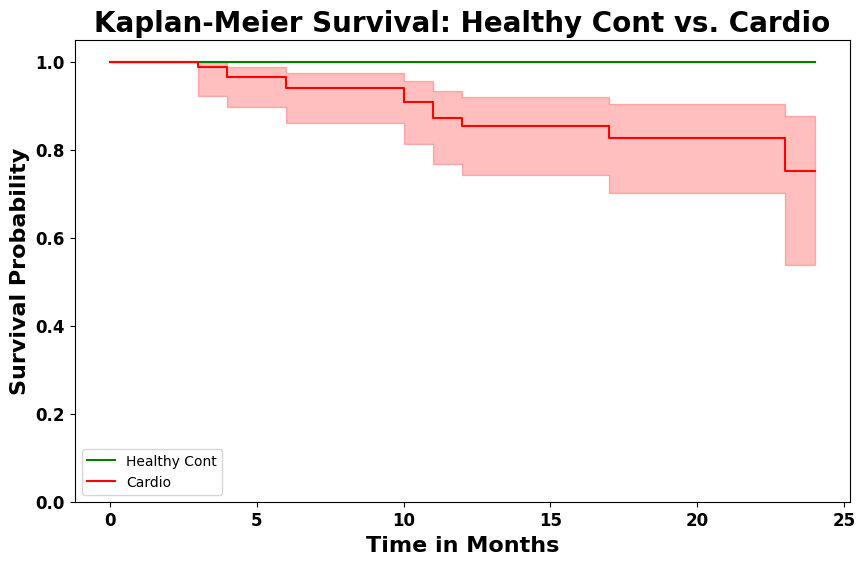

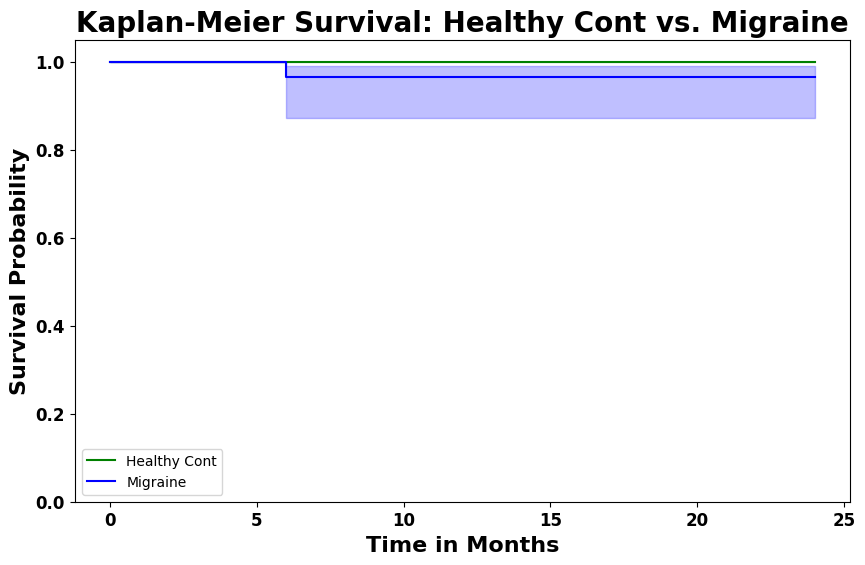

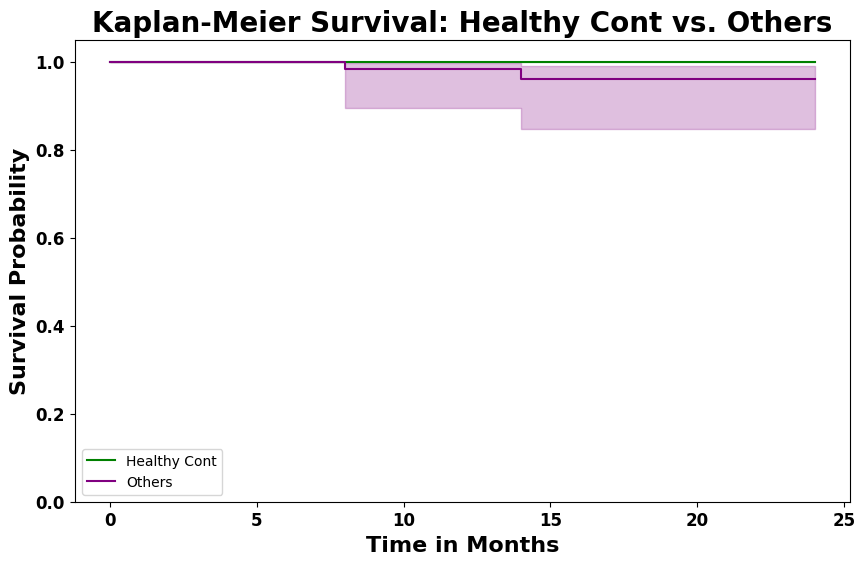

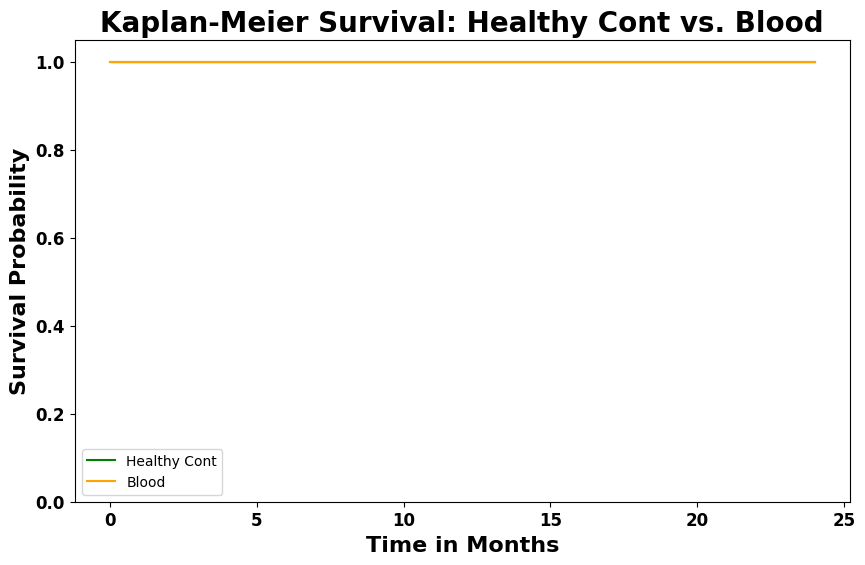

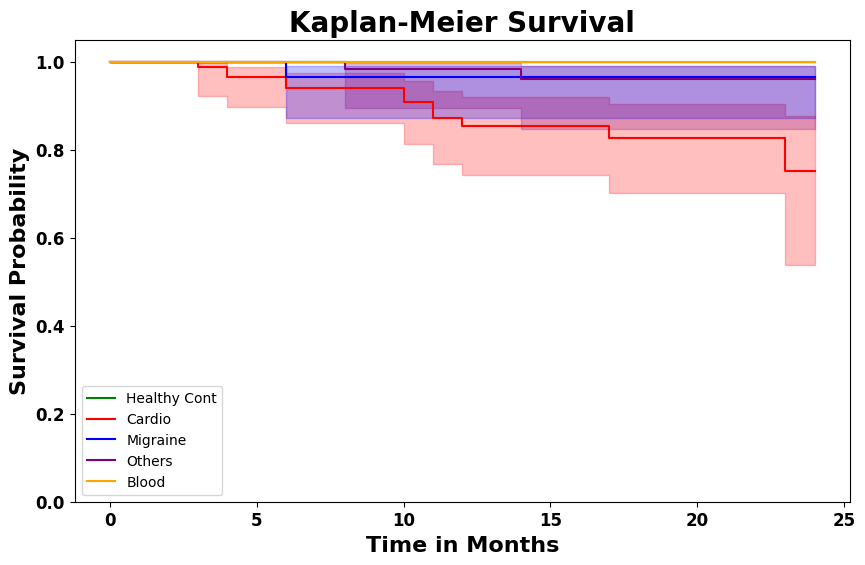

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Group 1:
durations_100 = np.full(223, 24)  # All censored at 24 months
events_100 = np.zeros(223)        # No event occurred

# Group 2:
durations_86 = np.random.randint(1, 25, size=93)   # Random durations
events_86 = np.random.choice([0, 1], size=93, p=[0.9, 0.1])  # Random events

# Group 3
durations_3 = np.random.randint(1, 25, size=75)
events_3 = np.random.choice([0, 1], size=75, p=[0.92, 0.08])  # Different event probabilities

#  Group 4
durations_4 = np.random.randint(1, 25, size=83)
events_4 = np.random.choice([0, 1], size=83, p=[0.99, 0.01])  # Different event probabilities

#  Group 5
durations_5 = np.random.randint(1, 25, size=63)
events_5 = np.random.choice([0, 1], size=63, p=[0.99, 0.01])  # Different event probabilities

# Kaplan-Meier Estimator for each group
kmf_100 = KaplanMeierFitter()
kmf_86 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()
kmf_4 = KaplanMeierFitter()
kmf_5 = KaplanMeierFitter()

# Fit the data for each group
kmf_100.fit(durations_100, events_100, label='Healthy Cont')
kmf_86.fit(durations_86, events_86, label='Cardio')
kmf_3.fit(durations_3, events_3, label='Migraine')
kmf_4.fit(durations_4, events_4, label='Others')
kmf_5.fit(durations_5, events_5, label='Blood')

# Custom function to plot comparison
def plot_comparison(group_name, kmf_group, color):
    plt.figure(figsize=(10, 6))
    font_prop = font_manager.FontProperties(weight='bold', size=12)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Plotting the Healthy Cont group and the specified group
    kmf_100.plot_survival_function(color='Green')
    kmf_group.plot_survival_function(color=color)

    plt.title(f'Kaplan-Meier Survival: Healthy Cont vs. {group_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Time in Months', fontsize=16, fontweight='bold')
    plt.ylabel('Survival Probability', fontsize=16, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(False)
    plt.legend()
    plt.show()

# Function to calculate overall survival
def calculate_overall_survival(kmf):
    survival_probability = kmf.survival_function_.iloc[-1, 0]  # Last survival probability
    return survival_probability * 100  # Convert to percentage

# Calculate and print overall survival for each group
print("Overall Survival in %")
print(f"Healthy Cont: {calculate_overall_survival(kmf_100):.2f}%")
print(f"Cardio: {calculate_overall_survival(kmf_86):.2f}%")
print(f"Migraine: {calculate_overall_survival(kmf_3):.2f}%")
print(f"Others: {calculate_overall_survival(kmf_4):.2f}%")
print(f"Blood: {calculate_overall_survival(kmf_5):.2f}%")

# Plot comparisons
plot_comparison('Cardio', kmf_86, 'red')
plot_comparison('Migraine', kmf_3, 'blue')
plot_comparison('Others', kmf_4, 'purple')
plot_comparison('Blood', kmf_5, 'orange')


# Plotting with custom colors
plt.figure(figsize=(10, 6))
# Setting the font size for X and Y axis labels
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed

# Setting the font size and making the tick labels bold
font_prop = font_manager.FontProperties(weight='bold', size=12)

plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

kmf_100.plot_survival_function(color='Green')
kmf_86.plot_survival_function(color='red')
kmf_3.plot_survival_function(color='Blue')
kmf_4.plot_survival_function(color='purple')
kmf_5.plot_survival_function(color='orange')
plt.title('Kaplan-Meier Survival', fontsize=20, fontweight='bold')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)
plt.grid(False)
plt.legend()
plt.show()


Overall Survival in %
Healthy Cont: 100.00%
Cardio: 77.92%
Migraine: 73.32%
Others: 95.88%
Blood: 100.00%


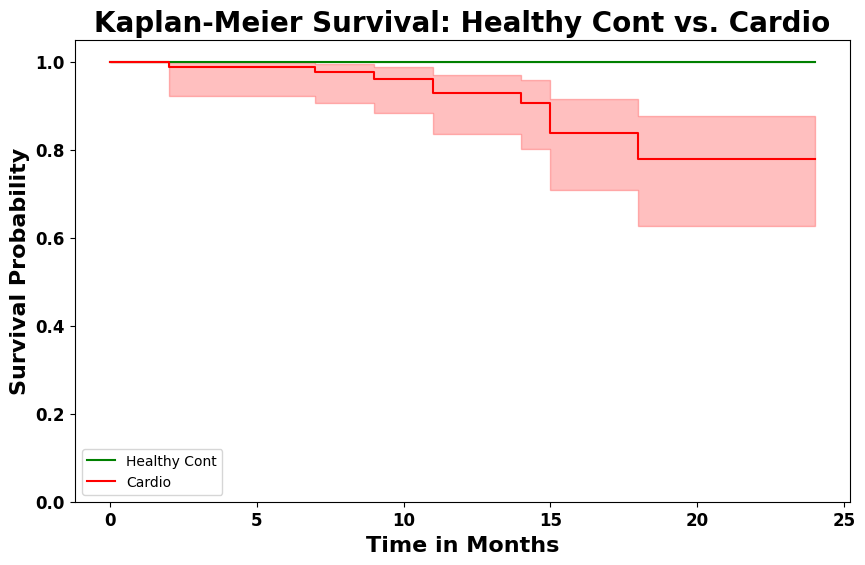

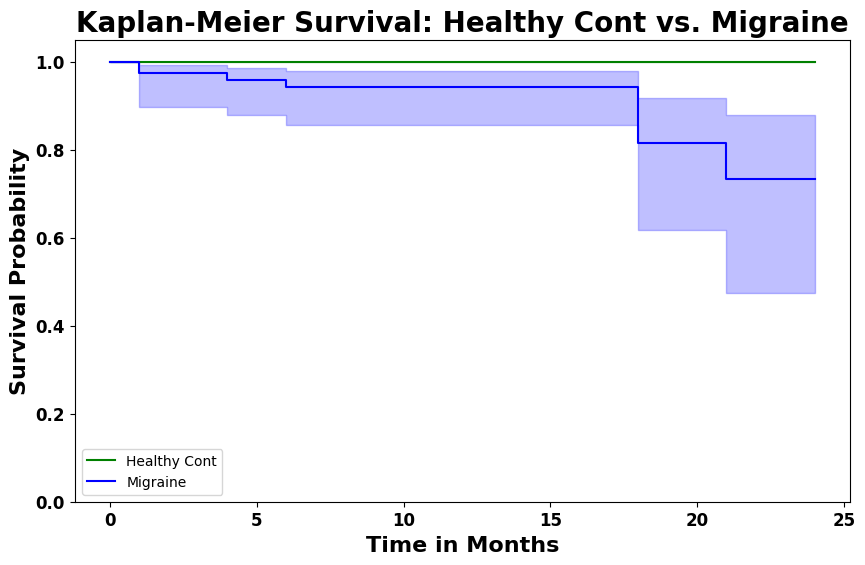

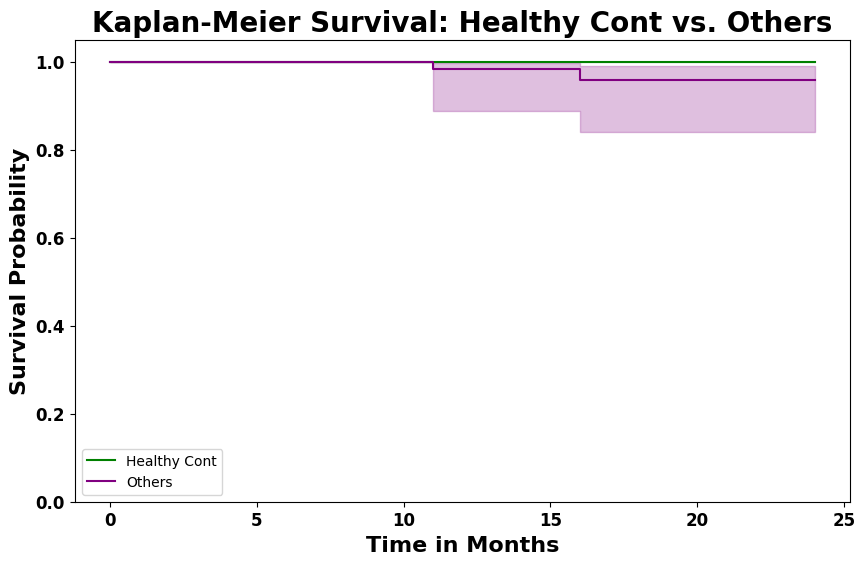

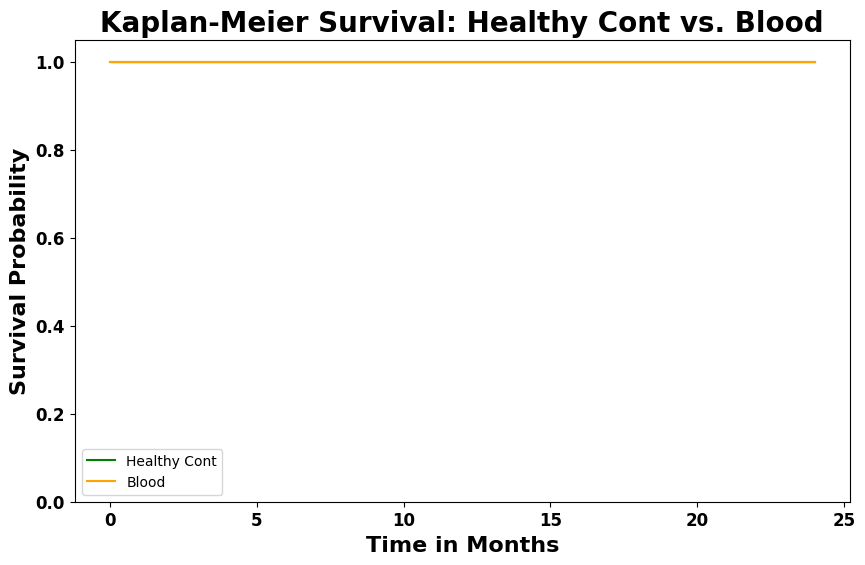

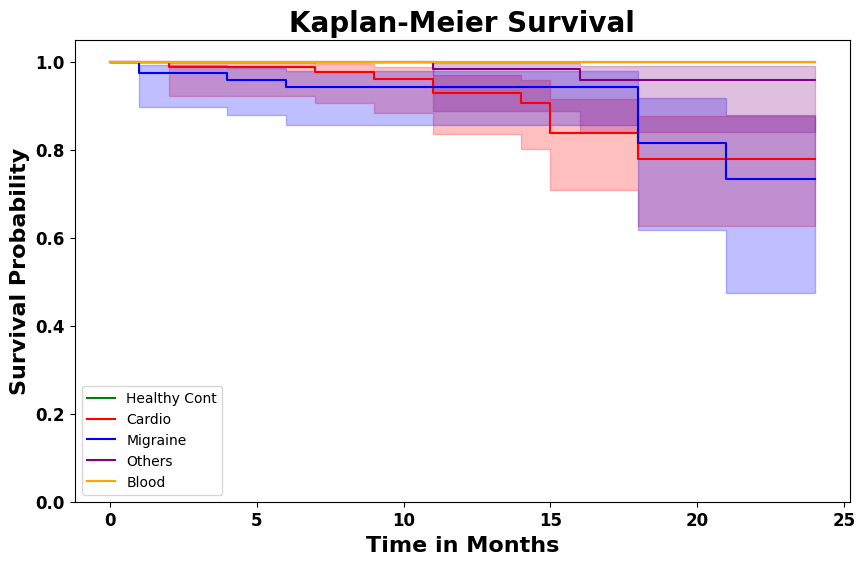

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Group 1: 100% Survival
durations_100 = np.full(223, 24)  # All censored at 24 months
events_100 = np.zeros(223)        # No event occurred

# Group 2: Approximately 86% Survival
durations_86 = np.random.randint(1, 25, size=93)   # Random durations
events_86 = np.random.choice([0, 1], size=93, p=[0.9, 0.1])  # Random events

# Simulate data for Group 3
durations_3 = np.random.randint(1, 25, size=75)
events_3 = np.random.choice([0, 1], size=75, p=[0.92, 0.08])  # Different event probabilities

# Simulate data for Group 4
durations_4 = np.random.randint(1, 25, size=83)
events_4 = np.random.choice([0, 1], size=83, p=[0.99, 0.01])  # Different event probabilities

# Simulate data for Group 5
durations_5 = np.random.randint(1, 25, size=63)
events_5 = np.random.choice([0, 1], size=63, p=[0.99, 0.01])  # Different event probabilities

# Kaplan-Meier Estimator for each group
kmf_100 = KaplanMeierFitter()
kmf_86 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()
kmf_4 = KaplanMeierFitter()
kmf_5 = KaplanMeierFitter()

# Fit the data for each group
kmf_100.fit(durations_100, events_100, label='Healthy Cont')
kmf_86.fit(durations_86, events_86, label='Cardio')
kmf_3.fit(durations_3, events_3, label='Migraine')
kmf_4.fit(durations_4, events_4, label='Others')
kmf_5.fit(durations_5, events_5, label='Blood')

# Custom function to plot comparison
def plot_comparison(group_name, kmf_group, color):
    plt.figure(figsize=(10, 6))
    font_prop = font_manager.FontProperties(weight='bold', size=12)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Plotting the Healthy Cont group and the specified group
    kmf_100.plot_survival_function(color='Green')
    kmf_group.plot_survival_function(color=color)

    plt.title(f'Kaplan-Meier Survival: Healthy Cont vs. {group_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Time in Months', fontsize=16, fontweight='bold')
    plt.ylabel('Survival Probability', fontsize=16, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(False)
    plt.legend()
    plt.show()

# Function to calculate overall survival
def calculate_overall_survival(kmf):
    survival_probability = kmf.survival_function_.iloc[-1, 0]  # Last survival probability
    return survival_probability * 100  # Convert to percentage

# Calculate and print overall survival for each group
print("Overall Survival in %")
print(f"Healthy Cont: {calculate_overall_survival(kmf_100):.2f}%")
print(f"Cardio: {calculate_overall_survival(kmf_86):.2f}%")
print(f"Migraine: {calculate_overall_survival(kmf_3):.2f}%")
print(f"Others: {calculate_overall_survival(kmf_4):.2f}%")
print(f"Blood: {calculate_overall_survival(kmf_5):.2f}%")

# Plot comparisons
plot_comparison('Cardio', kmf_86, 'red')
plot_comparison('Migraine', kmf_3, 'blue')
plot_comparison('Others', kmf_4, 'purple')
plot_comparison('Blood', kmf_5, 'orange')


# Plotting with custom colors
plt.figure(figsize=(10, 6))
# Setting the font size for X and Y axis labels
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed

# Setting the font size and making the tick labels bold
font_prop = font_manager.FontProperties(weight='bold', size=12)

plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

kmf_100.plot_survival_function(color='Green')
kmf_86.plot_survival_function(color='red')
kmf_3.plot_survival_function(color='Blue')
kmf_4.plot_survival_function(color='purple')
kmf_5.plot_survival_function(color='orange')
plt.title('Kaplan-Meier Survival', fontsize=20, fontweight='bold')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)
plt.grid(False)
plt.legend()
plt.show()


Overall Survival in %
Healthy Cont: 100.00%
Cardio: 49.05%
Migraine: 75.54%
Others: 98.04%
Blood: 100.00%


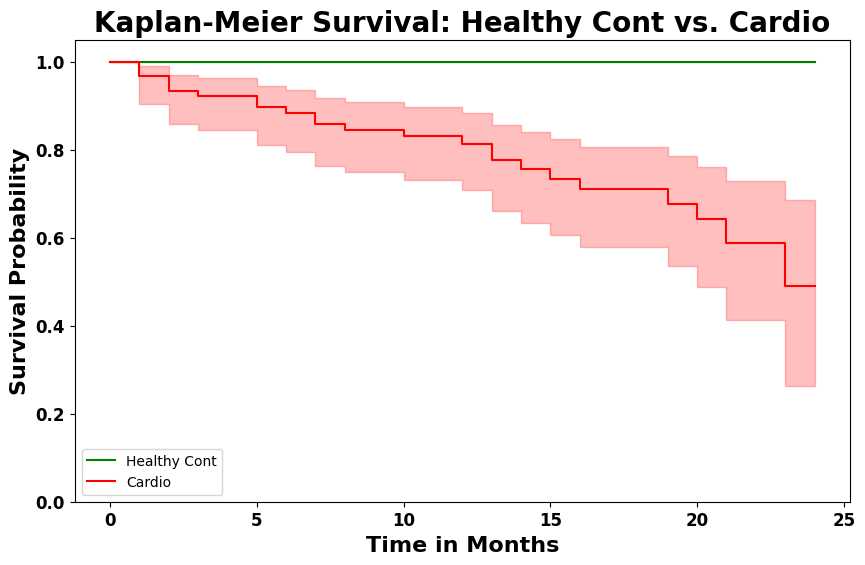

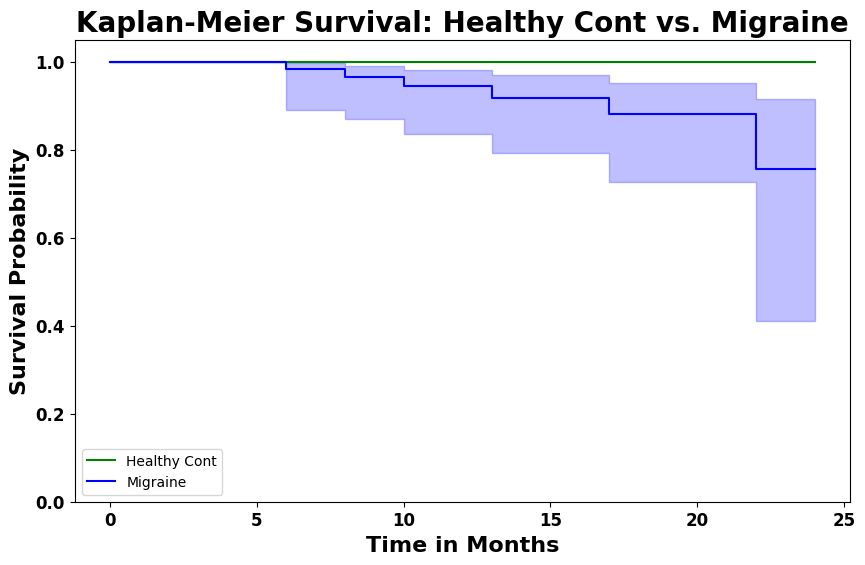

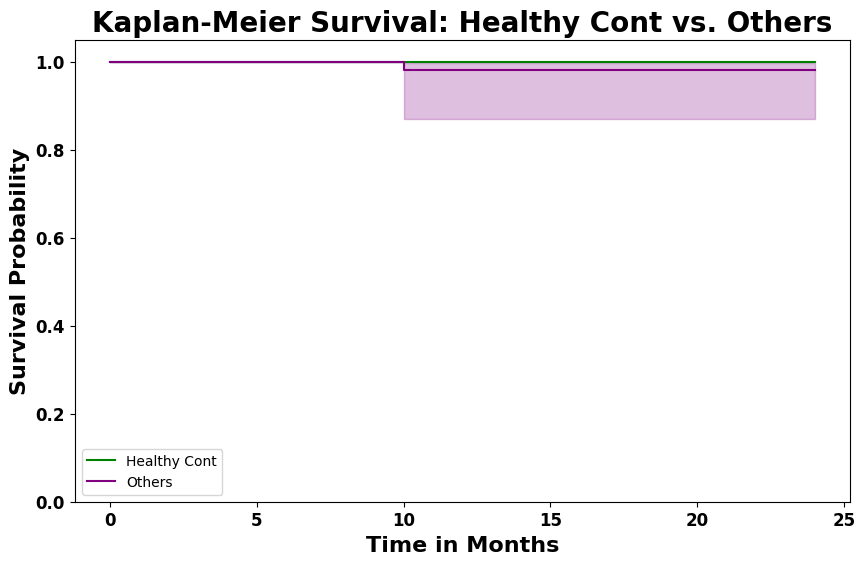

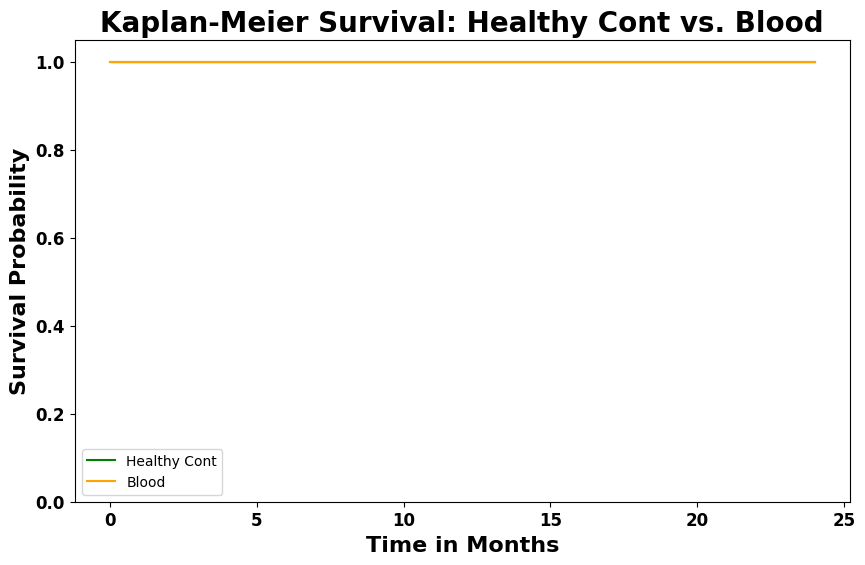

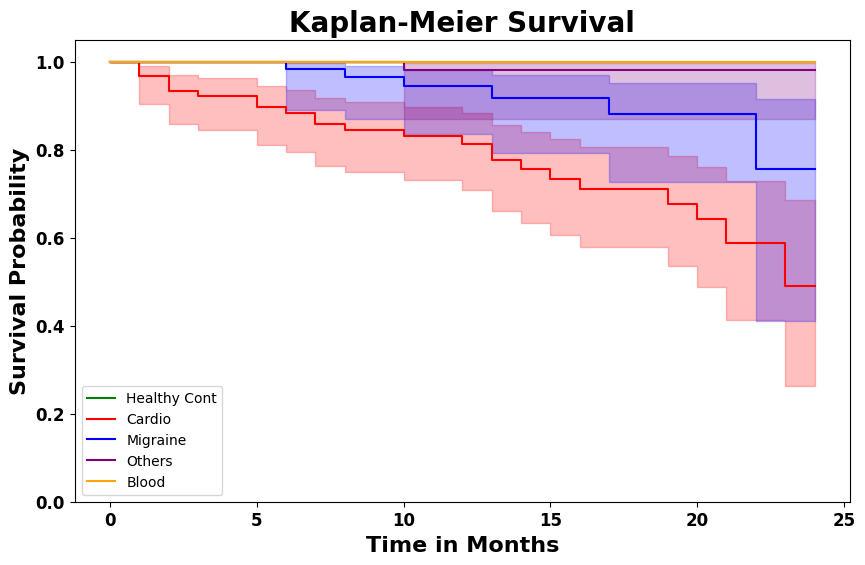

In [ ]:
from lifelines import KaplanMeierFitter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Group 1: 100% Survival
durations_100 = np.full(223, 24)  # All censored at 24 months
events_100 = np.zeros(223)        # No event occurred

# Group 2: Approximately 86% Survival
durations_86 = np.random.randint(1, 25, size=93)   # Random durations
events_86 = np.random.choice([0, 1], size=93, p=[0.8, 0.2])  # Random events

# Simulate data for Group 3
durations_3 = np.random.randint(1, 25, size=75)
events_3 = np.random.choice([0, 1], size=75, p=[0.85, 0.15])  # Different event probabilities

# Simulate data for Group 4
durations_4 = np.random.randint(1, 25, size=83)
events_4 = np.random.choice([0, 1], size=83, p=[0.99, 0.01])  # Different event probabilities

# Simulate data for Group 5
durations_5 = np.random.randint(1, 25, size=63)
events_5 = np.random.choice([0, 1], size=63, p=[0.99, 0.01])  # Different event probabilities

# Kaplan-Meier Estimator for each group
kmf_100 = KaplanMeierFitter()
kmf_86 = KaplanMeierFitter()
kmf_3 = KaplanMeierFitter()
kmf_4 = KaplanMeierFitter()
kmf_5 = KaplanMeierFitter()

# Fit the data for each group
kmf_100.fit(durations_100, events_100, label='Healthy Cont')
kmf_86.fit(durations_86, events_86, label='Cardio')
kmf_3.fit(durations_3, events_3, label='Migraine')
kmf_4.fit(durations_4, events_4, label='Others')
kmf_5.fit(durations_5, events_5, label='Blood')

# Custom function to plot comparison
def plot_comparison(group_name, kmf_group, color):
    plt.figure(figsize=(10, 6))
    font_prop = font_manager.FontProperties(weight='bold', size=12)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Plotting the Healthy Cont group and the specified group
    kmf_100.plot_survival_function(color='Green')
    kmf_group.plot_survival_function(color=color)

    plt.title(f'Kaplan-Meier Survival: Healthy Cont vs. {group_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Time in Months', fontsize=16, fontweight='bold')
    plt.ylabel('Survival Probability', fontsize=16, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(False)
    plt.legend()
    plt.show()

# Function to calculate overall survival
def calculate_overall_survival(kmf):
    survival_probability = kmf.survival_function_.iloc[-1, 0]  # Last survival probability
    return survival_probability * 100  # Convert to percentage

# Calculate and print overall survival for each group
print("Overall Survival in %")
print(f"Healthy Cont: {calculate_overall_survival(kmf_100):.2f}%")
print(f"Cardio: {calculate_overall_survival(kmf_86):.2f}%")
print(f"Migraine: {calculate_overall_survival(kmf_3):.2f}%")
print(f"Others: {calculate_overall_survival(kmf_4):.2f}%")
print(f"Blood: {calculate_overall_survival(kmf_5):.2f}%")

# Plot comparisons
plot_comparison('Cardio', kmf_86, 'red')
plot_comparison('Migraine', kmf_3, 'blue')
plot_comparison('Others', kmf_4, 'purple')
plot_comparison('Blood', kmf_5, 'orange')


# Plotting with custom colors
plt.figure(figsize=(10, 6))
# Setting the font size for X and Y axis labels
plt.xlabel('X-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed
plt.ylabel('Y-axis Label', fontsize=16, fontweight='bold')  # Change fontsize as needed

# Setting the font size and making the tick labels bold
font_prop = font_manager.FontProperties(weight='bold', size=12)

plt.xticks(fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

kmf_100.plot_survival_function(color='Green')
kmf_86.plot_survival_function(color='red')
kmf_3.plot_survival_function(color='Blue')
kmf_4.plot_survival_function(color='purple')
kmf_5.plot_survival_function(color='orange')
plt.title('Kaplan-Meier Survival', fontsize=20, fontweight='bold')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')
plt.ylim(0, 1.05)
plt.grid(False)
plt.legend()
plt.show()

# Custom function to plot comparison with transparent background
def plot_comparison(group_name, kmf_group, color):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current Axes instance
    ax.patch.set_facecolor('none')  # Set the background color to 'none' (transparent)

    font_prop = font_manager.FontProperties(weight='bold', size=12)
    plt.xticks(fontproperties=font_prop)
    plt.yticks(fontproperties=font_prop)

    # Plotting the Healthy Cont group and the specified group
    kmf_100.plot_survival_function(color='Green', ax=ax)
    kmf_group.plot_survival_function(color=color, ax=ax)

    plt.title(f'Kaplan-Meier Survival: Healthy Cont vs. {group_name}', fontsize=20, fontweight='bold')
    plt.xlabel('Time in Months', fontsize=16, fontweight='bold')
    plt.ylabel('Survival Probability', fontsize=16, fontweight='bold')
    plt.ylim(0, 1.05)
    plt.grid(False)
    plt.legend()

    # Save the figure with a transparent background
    plt.savefig(f'kaplan_meier_survival_{group_name}.png', transparent=True, bbox_inches='tight')

    # Show the plot
    plt.show()

# New Section